In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
plt.rc("font",size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid",color_codes=True)

c:\program files\python36\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
data_train = pd.read_csv(r'C:\Users\raja3\Downloads\train.csv',encoding="ISO-8859-1",engine = "python")
data_test = pd.read_csv(r'C:\Users\raja3\Downloads\test.csv',encoding="ISO-8859-1",engine = "python")
print(data_train.shape)
Y_label = data_train.Survived
print((list(data_train.columns)))
Y_label

(891, 12)
['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


0      0
1      1
2      1
3      1
4      0
5      0
6      0
7      0
8      1
9      1
10     1
11     1
12     0
13     0
14     0
15     1
16     0
17     1
18     0
19     1
20     0
21     1
22     1
23     1
24     0
25     1
26     0
27     0
28     1
29     0
      ..
861    0
862    1
863    0
864    0
865    1
866    1
867    0
868    0
869    1
870    0
871    1
872    0
873    0
874    1
875    1
876    0
877    0
878    0
879    1
880    1
881    0
882    0
883    0
884    0
885    0
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [4]:
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
data_train['Pclass'].unique()


array([3, 1, 2], dtype=int64)

In [6]:
#DATA EXPLORATION
data_train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

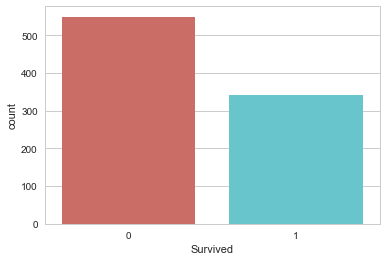

In [7]:
sns.countplot(x='Survived',data=data_train,palette='hls')
plt.show()

In [8]:
data_train.groupby('Survived').mean()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,,
0,447.016393,2.531876,30.626179,0.553734,0.329690,22.117887
1,444.368421,1.950292,28.343690,0.473684,0.464912,48.395408


In [9]:
data_train.groupby('Pclass').mean()

,PassengerId,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,,
1,461.597222,0.629630,38.233441,0.416667,0.356481,84.154687
2,445.956522,0.472826,29.877630,0.402174,0.380435,20.662183
3,439.154786,0.242363,25.140620,0.615071,0.393075,13.675550


In [10]:
data_train.groupby('Sex').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Sex,,,,,,,
female,431.028662,0.742038,2.159236,27.915709,0.694268,0.649682,44.479818
male,454.147314,0.188908,2.389948,30.726645,0.429809,0.235702,25.523893


In [11]:
data_train.groupby('Embarked').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Embarked,,,,,,,
C,445.357143,0.553571,1.886905,30.814769,0.386905,0.363095,59.954144
Q,417.896104,0.389610,2.909091,28.089286,0.428571,0.168831,13.276030
S,449.527950,0.336957,2.350932,29.445397,0.571429,0.413043,27.079812


In [12]:
data_train.groupby('SibSp').mean()

,PassengerId,Survived,Pclass,Age,Parch,Fare
SibSp,,,,,,
0,455.370066,0.345395,2.351974,31.397558,0.185855,25.692028
1,439.727273,0.535885,2.057416,30.089727,0.655502,44.147370
2,412.428571,0.464286,2.357143,22.620000,0.642857,51.753718
3,321.562500,0.250000,2.562500,13.916667,1.312500,68.908862
4,381.611111,0.166667,3.000000,7.055556,1.500000,31.855556
5,336.800000,0.000000,3.000000,10.200000,2.000000,46.900000
8,481.714286,0.000000,3.000000,NaN,2.000000,69.550000


Text(0,0.5,'Frequency of Survival')

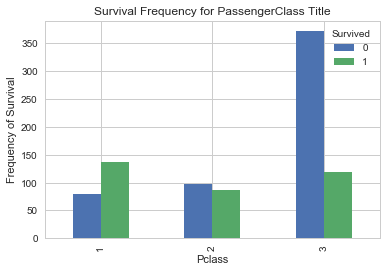

In [13]:
#VISUALIZATION
pd.crosstab(data_train.Pclass,data_train.Survived).plot(kind='bar')
plt.title('Survival Frequency for PassengerClass Title')
plt.xlabel('Pclass')
plt.ylabel('Frequency of Survival')

Text(0,0.5,'Frequency of Survival')

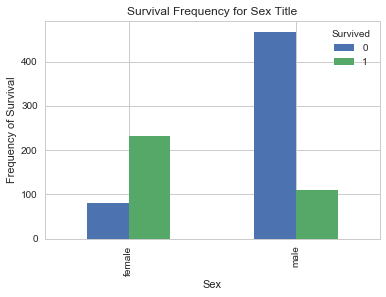

In [14]:
pd.crosstab(data_train.Sex,data_train.Survived).plot(kind='bar')
plt.title('Survival Frequency for Sex Title')
plt.xlabel('Sex')
plt.ylabel('Frequency of Survival')

Text(0,0.5,'Frequency of Survival')

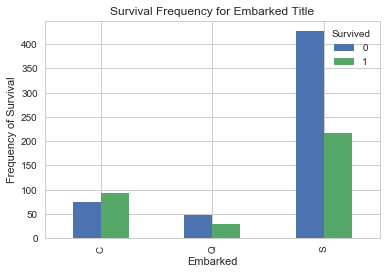

In [15]:
pd.crosstab(data_train.Embarked,data_train.Survived).plot(kind='bar')
plt.title('Survival Frequency for Embarked Title')
plt.xlabel('Embarked')
plt.ylabel('Frequency of Survival')

Text(0,0.5,'Frequency of Survival')

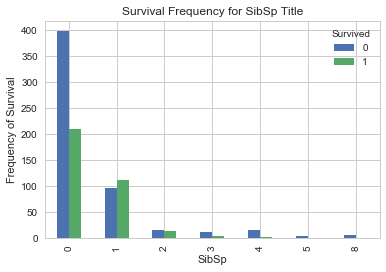

In [16]:
pd.crosstab(data_train.SibSp,data_train.Survived).plot(kind='bar')
plt.title('Survival Frequency for SibSp Title')
plt.xlabel('SibSp')
plt.ylabel('Frequency of Survival')

Text(0,0.5,'Frequency')

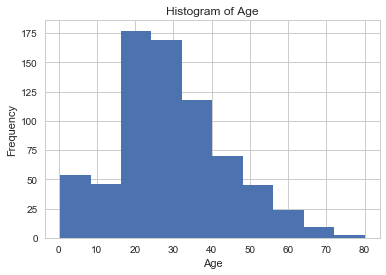

In [17]:
data_train.Age.hist()
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

In [22]:
#data_final = data_train[to_keep]
#from sklearn import datasets
#from sklearn.feature_selection import RFE

#rfe = RFE(lpgreg,18)
#rfe = rfe.fit(data_train[x],data_train[Survived])
#print(rfe.support_)
#print(rfe.ranking_)
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

labelencoder_x = LabelEncoder()
data_train['Sex'] = labelencoder_x.fit_transform(data_train['Sex'])
data_train.head()

#onehotencoder = OneHotEncoder(categorical_features = [0])
#X = onehotencoder.fit_transform(data_train['Sex']).toarray()

#X = data_train.iloc[:,[2,4]].values
#y = data_train.iloc[:,1].values

# MODEL IMPLEMENTATION
#import statsmodels.api as sm
#logit_model = sm.Logit()
#result = logit_model.fit()
#print(result.summary())


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


In [24]:
#label = LabelEncoder()
#data_train['Embarked'] = label.fit_transform(data_train['Embarked'])
#data_train.head()


In [2]:
from sklearn.linear_model import LogisticRegression

X_data = data_train[2,4,5,6,7,9]
clf = LogisticRegression(fit_intercept=True, C = 1e15)
clf.fit(,Y_label)

clf.predict(x_test)


SyntaxError: invalid syntax (<ipython-input-2-ed8f584f0847>, line 5)